# 상가(상권)정보를 활용한 데이터 분석 예제
- 데이터 용량이 크기 때문에 관련 데이터는 [다운로드](https://www.data.go.kr/data/15083033/fileData.do) 후 진행하세요.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rc("axes", unicode_minus=False)

In [3]:
%config InlineBackend.figure_formats = ['svg']

## 데이터 불러오기

In [4]:
df = pd.read_csv("../dataset/preprocessing/소상공인시장진흥공단_상가(상권)정보_20211231/소상공인시장진흥공단_상가(상권)정보_부산_202109.csv")

In [5]:
columns = ["상호명", "상권업종대분류명", "상권업종중분류명", "상권업종소분류명", 
           "시도명", "시군구명", "행정동명", "법정동명", "도로명", "경도", "위도"]

In [6]:
df = df[columns].copy()

## 전처리

In [7]:
# 상호명이 "NaN"인 의류 관련 업체를 삭제
df.drop(df.loc[df["상호명"].isnull()].index, inplace=True)

In [8]:
df["상호명_소문자"] = df["상호명"].str.lower()

In [9]:
df.loc[df["상호명_소문자"].str.contains("이디야|이디아|ediya")]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명,경도,위도,상호명_소문자
349,이디야커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,해운대구,반송1동,반송동,부산광역시 해운대구 아랫반송로,129.148858,35.225032,이디야커피
849,이디야커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,사하구,다대1동,다대동,부산광역시 사하구 다대로,128.966690,35.048200,이디야커피
1051,이디야커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,동구,초량3동,초량동,부산광역시 동구 중앙대로274번길,129.043920,35.121133,이디야커피
2038,이디아커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,동구,초량3동,초량동,부산광역시 동구 중앙대로332번길,129.046114,35.125441,이디아커피
6390,이디야커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,사하구,장림2동,장림동,부산광역시 사하구 장림번영로,128.974461,35.080463,이디야커피
...,...,...,...,...,...,...,...,...,...,...,...,...
130879,에이디아트트립커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,동구,수정2동,수정동,부산광역시 동구 수정로,129.045899,35.127489,에이디아트트립커피
134842,이디야커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,남구,대연3동,대연동,부산광역시 남구 수영로,129.100126,35.138456,이디야커피
135806,이디야커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,동래구,수민동,수안동,부산광역시 동래구 명륜로112번길,129.084789,35.203152,이디야커피
137566,이디아,음식,커피점/카페,커피전문점/카페/다방,부산광역시,수영구,민락동,민락동,부산광역시 수영구 광안해변로,129.129792,35.161088,이디아


In [10]:
df.loc[df["상호명_소문자"].str.contains("스타벅스|starbucks")]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명,경도,위도,상호명_소문자
2910,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,동구,초량3동,초량동,부산광역시 동구 중앙대로,129.040831,35.116346,스타벅스
5554,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,연산4동,연산동,부산광역시 연제구 반송로,129.083344,35.186967,스타벅스
6402,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,연제구,연산5동,연산동,부산광역시 연제구 중앙대로,129.080677,35.185431,스타벅스
8250,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,사하구,하단1동,하단동,부산광역시 사하구 낙동대로,128.968878,35.105350,스타벅스
8770,스타벅스서면NC점,음식,커피점/카페,커피전문점/카페/다방,부산광역시,부산진구,전포1동,전포동,부산광역시 부산진구 동천로,129.063037,35.157050,스타벅스서면nc점
...,...,...,...,...,...,...,...,...,...,...,...,...
130578,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,영도구,남항동,대교동1가,부산광역시 영도구 태종로,129.037287,35.094626,스타벅스
135454,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,금정구,구서1동,구서동,부산광역시 금정구 금강로,129.088734,35.246960,스타벅스
137857,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,남구,대연5동,대연동,부산광역시 남구 못골로,129.091920,35.136133,스타벅스
137935,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,해운대구,좌1동,좌동,부산광역시 해운대구 해운대로,129.177094,35.170597,스타벅스


In [11]:
df_cafe = df[df["상호명_소문자"].str.contains("이디야|이디아|ediya|스타벅스|starbucks")].copy()

In [12]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains("이디야|이디아|ediya"), "브랜드명"] = "이디야"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains("이디야|이디아|ediya"), "브랜드명"] = "스타벅스"

In [13]:
df_cafe

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명,경도,위도,상호명_소문자,브랜드명
349,이디야커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,해운대구,반송1동,반송동,부산광역시 해운대구 아랫반송로,129.148858,35.225032,이디야커피,이디야
849,이디야커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,사하구,다대1동,다대동,부산광역시 사하구 다대로,128.966690,35.048200,이디야커피,이디야
1051,이디야커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,동구,초량3동,초량동,부산광역시 동구 중앙대로274번길,129.043920,35.121133,이디야커피,이디야
2038,이디아커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,동구,초량3동,초량동,부산광역시 동구 중앙대로332번길,129.046114,35.125441,이디아커피,이디야
2910,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,동구,초량3동,초량동,부산광역시 동구 중앙대로,129.040831,35.116346,스타벅스,스타벅스
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137566,이디아,음식,커피점/카페,커피전문점/카페/다방,부산광역시,수영구,민락동,민락동,부산광역시 수영구 광안해변로,129.129792,35.161088,이디아,이디야
137857,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,남구,대연5동,대연동,부산광역시 남구 못골로,129.091920,35.136133,스타벅스,스타벅스
137935,스타벅스,음식,커피점/카페,커피전문점/카페/다방,부산광역시,해운대구,좌1동,좌동,부산광역시 해운대구 해운대로,129.177094,35.170597,스타벅스,스타벅스
138513,이디야커피,음식,커피점/카페,커피전문점/카페/다방,부산광역시,사상구,모라1동,모라동,부산광역시 사상구 사상로531번길,128.986495,35.192716,이디야커피,이디야


## 업종 분류를 활용하여 불필요한 데이터 삭제

In [14]:
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"].copy()

In [15]:
df_cafe["상권업종중분류명"].value_counts()

커피점/카페    241
Name: 상권업종중분류명, dtype: int64

## 시각화를 사용한 확인

<AxesSubplot:xlabel='시군구명', ylabel='count'>

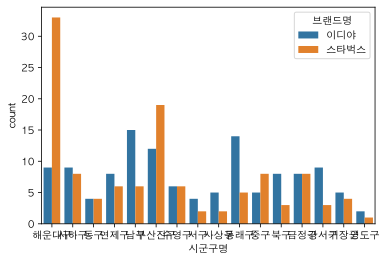

In [16]:
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

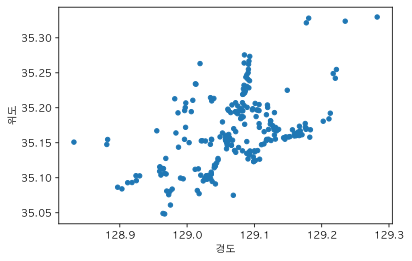

In [17]:
df_cafe[["위도", "경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

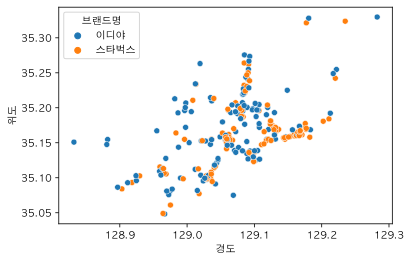

In [18]:
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

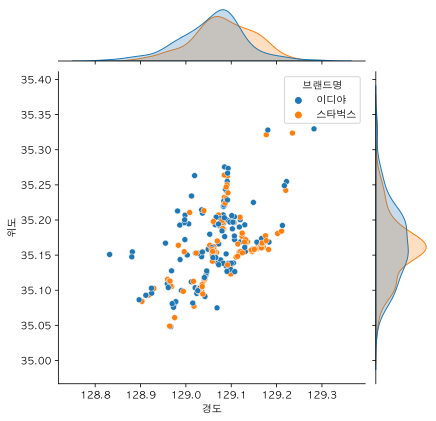

In [19]:
sns.jointplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

## 지도 시각화

In [20]:
import folium

In [21]:
lat = df_cafe["위도"].mean()
long = df_cafe["경도"].mean()

In [22]:
m = folium.Map([lat, long], zoom_start=12, tiles="Stamen Toner")

In [23]:
for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    title = f"{df_cafe.loc[i, '상호명']}-{df_cafe.loc[i, '도로명']}"
    color = "green"
    if df_cafe.loc[i, "브랜드명"] == "이디야":
        color = "blue"
    folium.CircleMarker([sub_lat, sub_long], radius=3, color=color, tooltip=title).add_to(m)

In [24]:
m

## 카토그램을 활용한 시각화

In [25]:
import json

In [26]:
m = folium.Map([lat, long])

In [34]:
geo_json = json.load(open("../dataset/preprocessing/Busan_GeoJSON.json", encoding="utf-8"))

In [35]:
df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강서구,스타벅스,3
1,강서구,이디야,9
2,금정구,스타벅스,8
3,금정구,이디야,8
4,기장군,스타벅스,4


In [36]:
df_star = df_cafe_vs[df_cafe_vs["브랜드명"]=="스타벅스"].copy()

In [37]:
folium.Choropleth(geo_data=geo_json, 
                  name="choropleth", 
                  data=df_star, 
                  columns=["시군구명", "상호명"],
                  key_on="feature.properties.name",
                  fill_color="YlGn",
                  fill_opacity=0.7,
                  line_opacity=0.2,
                  legend_name="스타벅스 매장수"
                 ).add_to(m)

In [38]:
m

In [39]:
m = folium.Map([lat, long], tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=["시군구명", "상호명"],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="스타벅스 매장수"
).add_to(m)

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    title = f"{df_cafe.loc[i, '상호명']} - {df_cafe.loc[i, '도로명']}"
    color = "green"
    if df_cafe.loc[i, "브랜드명"] == "스타벅스":
        color = "blue"
    
    folium.CircleMarker([sub_lat, sub_long],
                        radius=3,
                        color=color,
                        tooltip=title).add_to(m)

In [40]:
m